In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, auc,precision_score,recall_score
from mnist.loader import MNIST


In [2]:
df = pd.read_csv('breast_cancer.csv')
del df['Unnamed: 32']
x = df.iloc[:,2:]

y = df['diagnosis']
y = y.map({'M': 0, 'B': 1})
y = y.values


sc = MinMaxScaler()
x = sc.fit_transform(x)
x = np.c_[np.ones(len(x)),x]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_perceptron(X,Y,alpha = 0.1,iter = 2500):
    theta = np.random.uniform(size=(X.shape[1], 1))
    Y = Y.reshape(Y.shape[0], 1)
    for i in range(iter):
        z = X @ theta
        Y_pred = sigmoid(z)
        error = Y - Y_pred
        temp = alpha * error
        theta += X.T @ temp
    return theta
        
def evaluateClassifier(x,y,y_pred,y_score):
    cm = pd.DataFrame(
        confusion_matrix(y, y_pred),
        columns=['Predicted Benign', 'Predicted Malignant'],
        index=['True Benign', 'True Malignant']
    )
    print('\nConfusion Matrix: \n')
    print(cm)
    w1 = cm['Predicted Benign']['True Benign'] / (cm['Predicted Benign']['True Benign'] + cm['Predicted Malignant']['True Benign'])
    w2 = cm['Predicted Malignant']['True Malignant'] / (cm['Predicted Benign']['True Malignant'] + cm['Predicted Malignant']['True Malignant'])
    print('\nClasswise accuracy: ')
    print('\nBenign: ',w1 * 100)
    print('\nMalignant: ',w2 * 100)
    print('\nAccuracy of the model:',accuracy_score(y,y_pred) * 100)
    print('\nPrecision of the model:',precision_score(y,y_pred,average = 'macro') * 100)
    print('\nRecall of the model:',recall_score(y,y_pred,average = 'macro') * 100)
    print('\nF1 Score of the model:',2 * recall_score(y,y_pred,average = 'macro') * precision_score(y,y_pred,average = 'macro') / (recall_score(y,y_pred,average = 'macro') + precision_score(y,y_pred,average = 'macro')) * 100)
    
    fpr,tpr,_ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC curve')
    plt.show()

In [4]:
weights = train_perceptron(x_train,y_train)
h_theta = sigmoid(x_test @ weights)



Confusion Matrix: 

                Predicted Benign  Predicted Malignant
True Benign                   56                    2
True Malignant                 1                  112

Classwise accuracy: 

Benign:  96.55172413793103

Malignant:  99.11504424778761

Accuracy of the model: 98.24561403508771

Precision of the model: 98.24561403508771

Recall of the model: 97.83338419285931

F1 Score of the model: 98.03906578494706


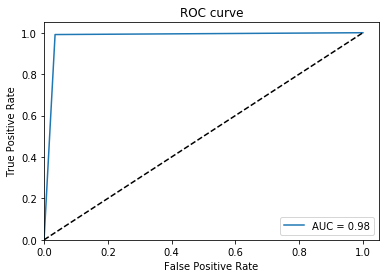

In [9]:
y_probs = h_theta
h_theta[h_theta >=  0.5] = 1
h_theta[h_theta <  0.5] = 0
y_probs.shape
evaluateClassifier(x_test,y_test,h_theta,y_probs)

In [6]:
mndata = MNIST(gz=True)
images, labels = mndata.load_training()
x_train, y_train = np.array(images), np.array(labels)
images, labels = mndata.load_testing()
x_test, y_test = np.array(images), np.array(labels)

x_train = x_train / 255
x_test = x_test / 255



In [7]:
training_acc = np.zeros(11)
testing_acc = np.zeros(11)
iter = 0
for i in range(30,41): 
    mlp = MLPClassifier(hidden_layer_sizes = (i), max_iter = 10, alpha=0.001, solver='sgd', verbose=False, learning_rate_init=0.01)
    
    mlp.fit(x_train, y_train)
    training_acc[iter] = mlp.score(x_train, y_train)
    
    mlp.fit(x_test, y_test)
    testing_acc[iter] = mlp.score(x_test, y_test)
    iter += 1


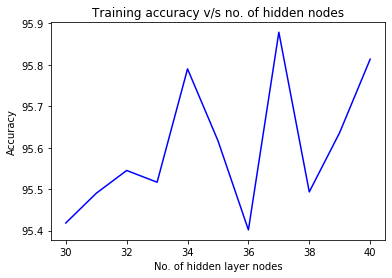

,No. of hidden nodes,Training Accuracy
0,30,95.418333
1,31,95.490000
2,32,95.545000
3,33,95.516667
4,34,95.790000
5,35,95.616667
6,36,95.401667
7,37,95.878333
8,38,95.493333
9,39,95.636667


In [8]:
plt.plot(range(30,41),training_acc * 100,'b-')
plt.xlabel('No. of hidden layer nodes')
plt.ylabel('Accuracy')
plt.title('Training accuracy v/s no. of hidden nodes')
plt.show()
s = pd.Series(training_acc * 100,range(30,41))
df = pd.DataFrame({'No. of hidden nodes':s.index, 'Training Accuracy':s.values})
df


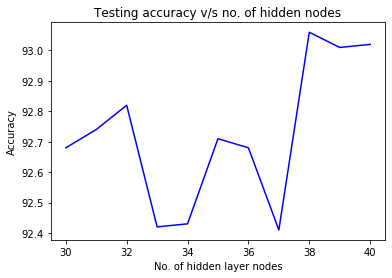

,No. of hidden nodes,Testing Accuracy
0,30,92.68
1,31,92.74
2,32,92.82
3,33,92.42
4,34,92.43
5,35,92.71
6,36,92.68
7,37,92.41
8,38,93.06
9,39,93.01


In [9]:
plt.plot(range(30,41),testing_acc * 100,'b-')
plt.xlabel('No. of hidden layer nodes')
plt.ylabel('Accuracy')
plt.title('Testing accuracy v/s no. of hidden nodes')
plt.show()
testing_acc * 100

s = pd.Series(testing_acc * 100,range(30,41))
df = pd.DataFrame({'No. of hidden nodes':s.index, 'Testing Accuracy':s.values})
df


## Since the maximum testing accuracy is with 40 hidden nodes, we will use 40 nodes in the hidden layer for classification.

In [10]:
mlp = MLPClassifier(hidden_layer_sizes = (40), max_iter = 10, alpha=0.001, solver='sgd', verbose=False, learning_rate_init=0.01)
mlp.fit(x_train,y_train)
h_theta = mlp.predict(x_test)
y_probs = mlp.predict_proba(x_test)


In [11]:
print('\nAccuracy of the model:',accuracy_score(y_test,h_theta) * 100)
print('\nPrecision of the model:',precision_score(y_test,h_theta,average = 'macro') * 100)
print('\nRecall of the model:',recall_score(y_test,h_theta,average = 'macro') * 100)
print('\nF1 Score of the model:',2 * recall_score(y_test,h_theta,average = 'macro') * precision_score(y_test,h_theta,average = 'macro') / (recall_score(y_test,h_theta,average = 'macro') + precision_score(y_test,h_theta,average = 'macro')) * 100)



Accuracy of the model: 95.54

Precision of the model: 95.53324933112116

Recall of the model: 95.48812561966062

F1 Score of the model: 95.51068214575346


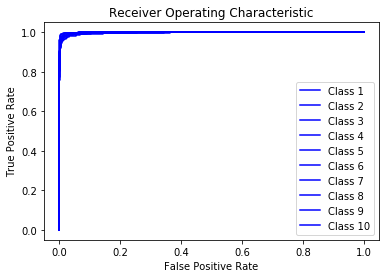

In [12]:

classes = range(10)
probabs = y_probs
y_test2 = label_binarize(y_test, classes)
for i in range(10):
    preds = probabs[:,i]    
    fpr, tpr, threshold = roc_curve(y_test2[:, i], preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'Class ' + str(i + 1))
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()
